<a href="https://colab.research.google.com/github/RGheonea/CovidApp/blob/main/CovidModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing the needed libraries, that will help us run the program

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from keras.preprocessing import image
from keras import layers
from keras import models
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:
#Importing the dataset from Google Drive, and checking the info
#of the dataset
dataset = pd.read_csv("/content/drive/MyDrive/COVID.csv")

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Columns: 150532 entries, Unnamed: 0 to labels
dtypes: int64(150530), object(2)
memory usage: 346.8+ MB


In [ ]:
#Showing the head of the dataset, which is the columns and the first 5 rows
dataset.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,0,1,2,3,4,5,6,...,150519,150520,150521,150522,150523,150524,150525,150526,150527,labels
0,0,0,23E99E2E-447C-46E5-8EB2-D35D12473C39.png,108,108,108,108,108,108,108,...,51,51,51,33,33,33,23,23,23,covid
1,1,1,jkms-35-e79-g001-l-e.jpg,78,78,78,34,34,34,34,...,53,53,53,51,51,51,42,42,42,covid
2,2,2,all14238-fig-0001-m-c.jpg,14,14,14,16,16,16,16,...,77,77,77,62,62,62,55,55,55,covid
3,3,3,acute-respiratory-distress-syndrome-ards.jpg,0,0,0,0,0,0,0,...,144,144,144,137,137,137,127,127,127,covid
4,4,4,kjr-21-e24-g002-l-b.jpg,109,109,109,88,88,88,89,...,129,129,129,129,129,129,144,144,144,covid


In [ ]:
#Dropping the first two columns and indexing the dataset from the third one,
#as the first two columns are redundant
dataset = dataset.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1)
dataset = dataset.set_index(['Unnamed: 0.1.1'])

dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,150519,150520,150521,150522,150523,150524,150525,150526,150527,labels
Unnamed: 0.1.1,,,,,,,,,,,,,,,,,,,,,
23E99E2E-447C-46E5-8EB2-D35D12473C39.png,108,108,108,108,108,108,108,108,108,100,...,51,51,51,33,33,33,23,23,23,covid
jkms-35-e79-g001-l-e.jpg,78,78,78,34,34,34,34,34,34,35,...,53,53,53,51,51,51,42,42,42,covid
all14238-fig-0001-m-c.jpg,14,14,14,16,16,16,16,16,16,17,...,77,77,77,62,62,62,55,55,55,covid
acute-respiratory-distress-syndrome-ards.jpg,0,0,0,0,0,0,0,0,0,0,...,144,144,144,137,137,137,127,127,127,covid
kjr-21-e24-g002-l-b.jpg,109,109,109,88,88,88,89,89,89,84,...,129,129,129,129,129,129,144,144,144,covid


In [ ]:
#Preprocessing the data, getting it ready to be worked on by the model
#x is the array of images, y is the array of labels (covid and normal)
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

sc = StandardScaler()
x = sc.fit_transform(x)

x.shape, y.shape

((302, 150528), (302,))

In [ ]:
#Reshaping the images into the size of 224x224 px, with a channel depth of 3
x = x.reshape(len(x), 224, 224, 3).astype(float)

In [ ]:
#Splitting the dataset into batches for training, testing and validation, using
#the train_test_split function from tensorflow
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, 
                                                    random_state = 42)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                  test_size = 0.1, 
                                                  random_state = 42)

#Showing the shape of the splits
#In the case of the shapes of x arrays, the first value is the number of samples,
#the next two values are the pixel size of the images, and the third value is 
#the depth of the image - in this case, it's 3 for the RGB channel
#The shape of y arrays is just represented by the number of labels for each 
#image in the x arrays
x_train.shape, y_train.shape, x_test.shape, y_test.shape, x_val.shape, y_val.shape

((189, 224, 224, 3),
 (189,),
 (91, 224, 224, 3),
 (91,),
 (22, 224, 224, 3),
 (22,))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


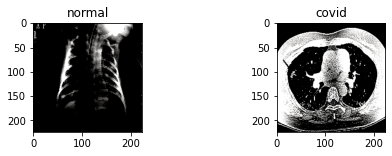

In [ ]:
#Showing a sample of two images and their labels, one image of normal lungs and
#one image of covid-affected lungs, making sure that the dataset has been 
#successfully imported and resized
fig, (fig1, fig2) = plt.subplots(1, 2, figsize = (8, 2))

fig1.imshow(x_train[1])
fig2.imshow(x_train[-1])
fig1.title.set_text(y_train[1])
fig2.title.set_text(y_train[-1])

In [ ]:
#Using a label encoder in order to encode the image labels 
#The labels are then transformed into int(integer) values,
#which will be used to identify the two categories 
#in the dataset (1 - normal and 0 - covid)
le = LabelEncoder()

y_train = le.fit_transform(y_train)
y_train = to_categorical(y_train).astype(int)

y_test = le.fit_transform(y_test)
y_test = to_categorical(y_test).astype(int)

y_val = le.fit_transform(y_val)
y_val = to_categorical(y_val).astype(int)

In [ ]:
#Building the model, adding the convolutional layers and showing its summary
model = keras.Sequential([
        layers.Conv2D(filters = 16, kernel_size = 5, activation = "relu",  
                      padding = 'same', input_shape = [224, 224, 3]),
        layers.MaxPooling2D(),

        layers.Conv2D(filters = 32, kernel_size = 5, activation = "relu",
                      padding = 'same'),
        layers.MaxPooling2D(),

        layers.Conv2D(filters = 64, kernel_size = 5, activation = "relu",  
                      padding = 'same'),
        layers.MaxPooling2D(),

        layers.Flatten(),
        layers.Dense(units = 2, activation = "sigmoid")             
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 224, 224, 16)      1216      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 112, 112, 16)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 112, 112, 32)      12832     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 56, 56, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 56, 56, 64)        51264     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 28, 28, 64)      

In [ ]:
#Augmenting the data with the ImageDataGenerator function from tensorflow
generator = image.ImageDataGenerator(rescale = 1/255, fill_mode = "nearest")

#Compiling the model, using the adam optimizer with a binary crossentropy
model.compile(
    optimizer = tf.keras.optimizers.Adam(epsilon = 0.01),
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

#Training the model, using 50 epochs and showing the results of each epoch
#(verbose = 1)
history = model.fit(
    generator.flow(x_train, y_train),
    epochs = 50,
    verbose = 1,
    validation_data = generator.flow(x_val, y_val)
)

Epoch 1/50
6/6 [==============================] - 16s 3s/step - loss: 0.6931 - accuracy: 0.5608 - val_loss: 0.6929 - val_accuracy: 0.5455
Epoch 2/50
6/6 [==============================] - 15s 3s/step - loss: 0.6929 - accuracy: 0.5185 - val_loss: 0.6927 - val_accuracy: 0.5455
Epoch 3/50
6/6 [==============================] - 16s 3s/step - loss: 0.6927 - accuracy: 0.5079 - val_loss: 0.6925 - val_accuracy: 0.5455
Epoch 4/50
6/6 [==============================] - 16s 3s/step - loss: 0.6926 - accuracy: 0.5026 - val_loss: 0.6923 - val_accuracy: 0.5455
Epoch 5/50
6/6 [==============================] - 15s 3s/step - loss: 0.6924 - accuracy: 0.5026 - val_loss: 0.6920 - val_accuracy: 0.5455
Epoch 6/50
6/6 [==============================] - 16s 3s/step - loss: 0.6923 - accuracy: 0.5026 - val_loss: 0.6919 - val_accuracy: 0.5455
Epoch 7/50
6/6 [==============================] - 15s 3s/step - loss: 0.6921 - accuracy: 0.5026 - val_loss: 0.6916 - val_accuracy: 0.5455
Epoch 8/50
6/6 [==================

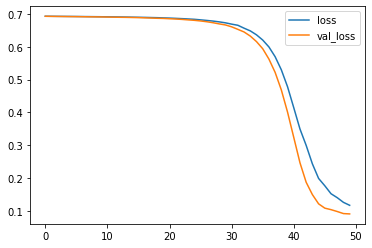

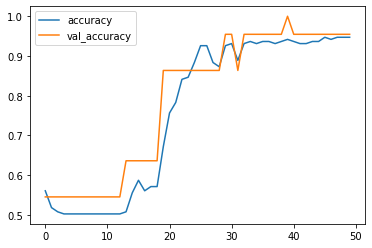

In [ ]:
#Showing the loss and the accuracy graphs
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();

In [ ]:
#Evaluating the model
model.evaluate(x=x_test, y=y_test)

3/3 [==============================] - 2s 604ms/step - loss: 3.3871 - accuracy: 0.9670


[3.3871004581451416, 0.9670329689979553]

In [ ]:
#Showing the precision score of the model
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred)

print(precision)

0.9555555555555556


In [ ]:
#Showing the recall score of the model
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred)

print(recall)

0.9772727272727273


In [ ]:
#Making an array of predicted label values which will be compared to the 
#actual label values in the dataset
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis = 1)
y_test = np.argmax(y_test, axis = 1)

y_pred_cat = []
y_test_cat = []

#If the label of the image is 0, then it will be classified as covid,
#whereas if the label is 1, it will be classified as normal
def cat(array, predict):
    for i in range(len(array)):
        if array[i] == 0:
            predict.append("covid")
        else:
            predict.append("normal")
cat(y_pred, y_pred_cat)
cat(y_test, y_test_cat)

print(y_pred_cat)

['normal', 'normal', 'covid', 'normal', 'covid', 'covid', 'covid', 'normal', 'normal', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'covid', 'covid', 'normal', 'normal', 'covid', 'normal', 'covid', 'covid', 'normal', 'normal', 'covid', 'covid', 'normal', 'covid', 'normal', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'normal', 'normal', 'covid', 'normal', 'normal', 'normal', 'normal', 'covid', 'covid', 'normal', 'normal', 'normal', 'covid', 'normal', 'normal', 'normal', 'covid', 'normal', 'normal', 'covid', 'normal', 'covid', 'covid', 'covid', 'normal', 'covid', 'normal', 'normal', 'covid', 'normal', 'covid', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'covid', 'covid', 'covid', 'normal', 'normal', 'covid', 'covid', 'covid', 'covid']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


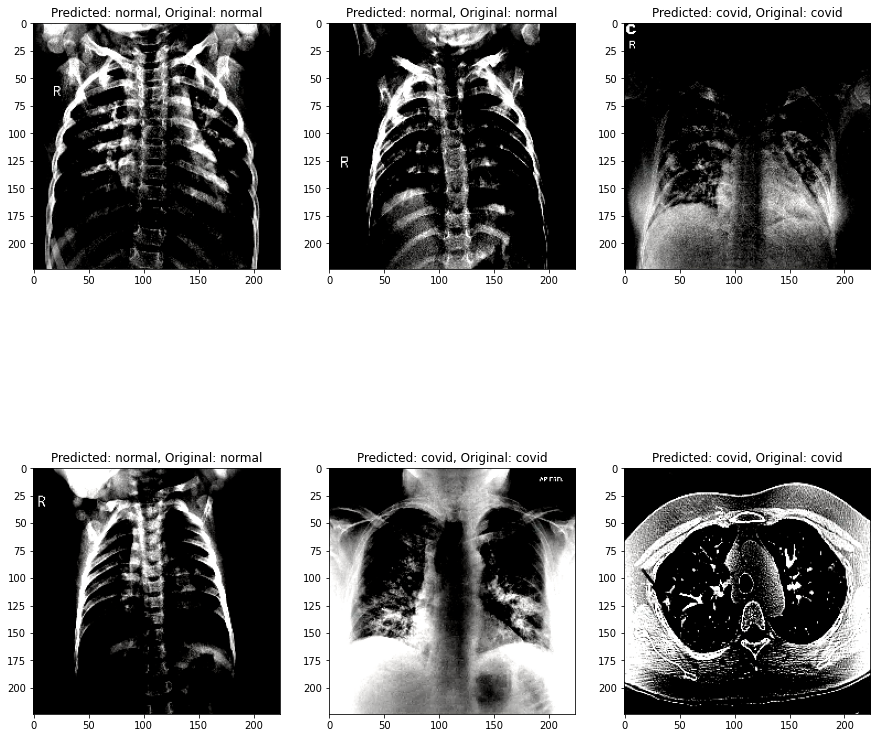

In [ ]:
#Showing a sample of the prediction results, comparing the predicted labels to
#the actual labels of the images in the dataset
fig, ((im1, im2, im3), (im4,im5, im6)) = plt.subplots(2,3, figsize=(15, 15))

im1.imshow(x_test[0])
im1.title.set_text("Predicted: "+y_pred_cat[0]+", Original: "+y_test_cat[0])

im2.imshow(x_test[1])
im2.title.set_text("Predicted: "+y_pred_cat[1]+", Original: "+y_test_cat[1])

im3.imshow(x_test[2])
im3.title.set_text("Predicted: "+y_pred_cat[2]+", Original: "+y_test_cat[2])

im4.imshow(x_test[3])
im4.title.set_text("Predicted: "+y_pred_cat[3]+", Original: "+y_test_cat[3])

im5.imshow(x_test[4])
im5.title.set_text("Predicted: "+y_pred_cat[4]+", Original: "+y_test_cat[4])

im6.imshow(x_test[5])
im6.title.set_text("Predicted: "+y_pred_cat[5]+", Original: "+y_test_cat[5])